In [243]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [244]:
# import dataset
url = "https://raw.githubusercontent.com/feliciagraciella/DataMiningWeek8/main/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.00,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.00,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.00,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.00,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [245]:
# jumlah baris dan kolom
print(df.shape)

(308, 12)


In [246]:
df.dtypes

Area Category                     object
Nama Daerah                       object
Luas Tanah (m2)                  float64
Luas Bangunan (m2)                object
Jumlah Kamar                     float64
Jumlah Kamar Mandi               float64
Tingkat/Lantai                   float64
Harga Penawaran (dari Owner)      object
Terjual/Belum                     object
Arah Hadap Rumah                  object
Posisi Rumah                      object
Lebar Jalan Depan Rumah (ROW)     object
dtype: object

DATA PREPARATION

In [247]:
# drop row pertama karena NaN
df = df.iloc[1:,:]
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.00,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.00,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.00,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.00,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.00,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [248]:
# cek apakah masih ada missing value pada data
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [249]:
df.columns

Index(['Area Category', 'Nama Daerah', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah',
       'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)'],
      dtype='object')

In [250]:
# # drop kolom posisi rumah karena terlalu banyak missing values
# df = df[['Area Category', 'Nama Daerah', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
#        'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
#        'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah','Lebar Jalan Depan Rumah (ROW)']]
# df

In [251]:
# drop kolom Nama Daerah karena terlalu banyak macam 
df['Nama Daerah'].unique()

df = df[['Area Category', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']]
df

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,30.0,60.00,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,170.0,170.00,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.00,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.00,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,450.0,530.00,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,47.0,34,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,300.0,212,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,102.0,156,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,98.0,170,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [252]:
# mengisi kolom dengan missing value dengan most frequent
from sklearn.impute import SimpleImputer

meanimputer = SimpleImputer(strategy='mean')
df[['Jumlah Kamar Mandi']] = meanimputer.fit_transform(df[['Jumlah Kamar Mandi']])
df[['Tingkat/Lantai ']] = meanimputer.fit_transform(df[['Tingkat/Lantai ']])

mostfrequentimputer = SimpleImputer(strategy='most_frequent')
df[['Arah Hadap Rumah']] = mostfrequentimputer.fit_transform(df[['Arah Hadap Rumah']])
df[['Posisi Rumah']] = mostfrequentimputer.fit_transform(df[['Posisi Rumah']])
df[['Lebar Jalan Depan Rumah (ROW)']] = mostfrequentimputer.fit_transform(df[['Lebar Jalan Depan Rumah (ROW)']])

df.isnull().any()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Area Category                    False
Luas Tanah (m2)                  False
Luas Bangunan (m2)               False
Jumlah Kamar                     False
Jumlah Kamar Mandi               False
Tingkat/Lantai                   False
Harga Penawaran (dari Owner)     False
Terjual/Belum                    False
Arah Hadap Rumah                 False
Posisi Rumah                     False
Lebar Jalan Depan Rumah (ROW)    False
dtype: bool

In [253]:
# encoding
from sklearn.preprocessing import LabelEncoder

# data nominal
le = LabelEncoder()
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])

# data ordinal
lebarjalan_map = {'< 1 Mobil':1, '1-2 Mobil':2, '> 2 Mobil':3}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(lebarjalan_map)

area_category_map = {'Below Standard': 3, 'Standard': 2, 'Premium': 1, 'Sangat Premium': 0}
df['Area Category'] = df['Area Category'].map(area_category_map)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,3,30.0,60.00,2.0,1.0,2.0,287799000,0,3,2,1
2,2,170.0,170.00,5.0,4.0,2.0,2699999999,0,1,0,2
3,0,187.0,250.00,5.0,5.0,2.0,3100000000,0,3,2,2
4,1,350.0,600.00,5.0,5.0,2.0,5000000000,0,0,2,2
5,1,450.0,530.00,5.0,6.0,2.0,10800000000,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
303,2,47.0,34,2.0,1.0,1.0,450000000,0,3,2,3
304,0,300.0,212,4.0,4.0,1.0,5250000000,0,1,2,2
305,1,102.0,156,4.0,2.0,2.0,1950000000,0,1,2,2
306,2,98.0,170,4.0,3.0,2.0,1550000000,0,3,2,3


In [254]:
# scaling
df['Luas Bangunan (m2)'].loc[df['Luas Bangunan (m2)']=='4 98'] = 498
df['Luas Bangunan (m2)'].loc[df['Luas Bangunan (m2)']=='1,000.00'] = 1000.00
df['Harga Penawaran (dari Owner)'].loc[df['Harga Penawaran (dari Owner)']=='10,500,000,000.00'] = 10500000000.00
df.drop(df[df['Harga Penawaran (dari Owner)'] == " "].index, inplace = True)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled = sc.fit_transform(df)
scaleddf = pd.DataFrame(scaled, columns=['Area Category', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)'])
scaleddf.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1.741623,-0.974919,-0.968013,-1.381932,-1.434933,0.281871,-0.566622,0.0,0.840004,-0.188704,-2.404079
1,0.496444,-0.282302,-0.452780,0.440789,0.409103,0.281871,-0.276647,0.0,-1.137237,-5.438105,-0.596590
2,-1.993914,-0.198198,-0.078066,0.440789,1.023782,0.281871,-0.228562,0.0,0.840004,-0.188704,-0.596590
3,-0.748735,0.608207,1.561311,0.440789,1.023782,0.281871,-0.000159,0.0,-2.125857,-0.188704,-0.596590
4,-0.748735,1.102934,1.233436,0.440789,1.638460,0.281871,0.697071,0.0,0.840004,-0.188704,-0.596590


In [255]:
df["Luas Bangunan (m2)"] = df["Luas Bangunan (m2)"].astype('float')
df["Harga Penawaran (dari Owner)"] = df["Harga Penawaran (dari Owner)"].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


K Means

In [256]:
from sklearn.cluster import KMeans
parameter = scaleddf

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(parameter)
    distortions.append(kmeanModel.inertia_)
    print("K =", k, " ", distortions[k-1])

K = 1   3060.0
K = 2   2304.689322898642
K = 3   1969.6861106488846
K = 4   1822.5648060022058
K = 5   1683.361043971379
K = 6   1552.042337220941
K = 7   1450.6435556370539
K = 8   1393.704539773732
K = 9   1312.395729776927
K = 10   1254.1747780788978


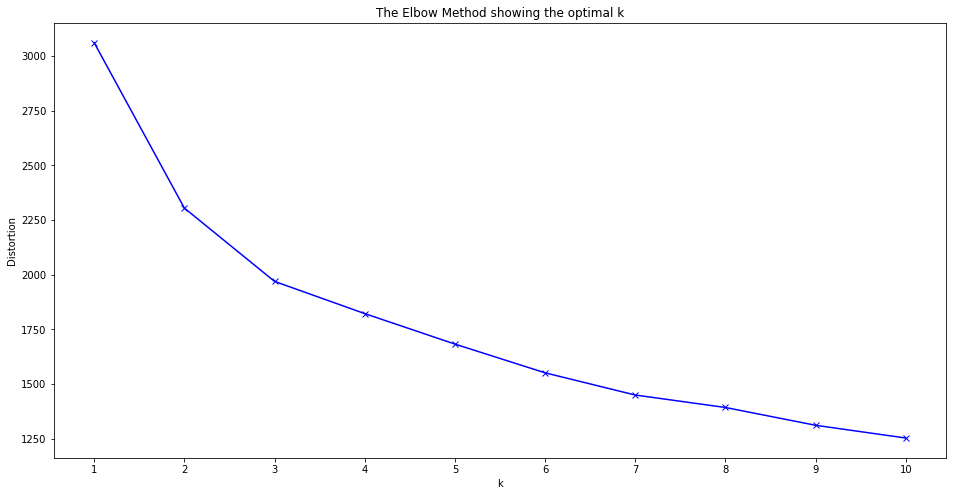

The optimal k for the model is 3


In [257]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

from kneed import DataGenerator, KneeLocator

knee = KneeLocator(K, distortions, curve="convex", direction="decreasing")
print("The optimal k for the model is", knee.elbow)

In [258]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=1)
kmeansmodel = kmeans.fit_predict(scaleddf)
kmeansmodel

array([2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2,

In [259]:
df0 = df
df0['K means'] = kmeansmodel


df0.groupby('K means').agg(AreaCategory = ('Area Category', 'mean'), 
                           LuasTanah = ('Luas Tanah (m2)', pd.Series.mode), 
                           LuasBangunan = ('Luas Bangunan (m2)', 'mean'), 
                           JumlahKamar = ('Jumlah Kamar', 'mean'), 
                           JumlahKamarMandi = ('Jumlah Kamar Mandi', 'mean'), 
                          Tingkat = ('Tingkat/Lantai ', pd.Series.mode), 
                          Harga = ('Harga Penawaran (dari Owner)', 'mean'), 
                          ArahHadap = ('Arah Hadap Rumah', pd.Series.mode), 
                          Posisi = ('Posisi Rumah', pd.Series.mode), 
                          LebarJalan = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), 
                          Count = ('K means', 'count'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AreaCategory,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,Harga,ArahHadap,Posisi,LebarJalan,Count
K means,,,,,,,,,,,
0,0.833333,450.0,651.791667,6.270833,5.250000,2.0,1.720656e+10,3,2,3,48
1,1.397436,240.0,245.641026,4.653846,3.705128,2.0,3.530775e+09,3,2,2,156
2,2.274510,"[60.0, 72.0]",117.588235,2.754902,1.866077,2.0,1.506754e+09,3,2,2,102


Hierarchical Clustering

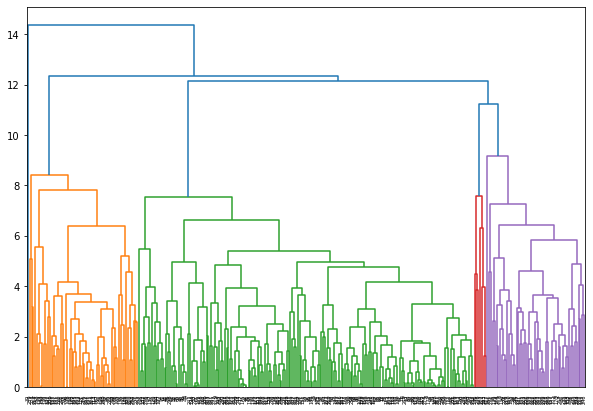

In [260]:
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
dendro = hie.dendrogram(hie.linkage(scaleddf, method="complete"))

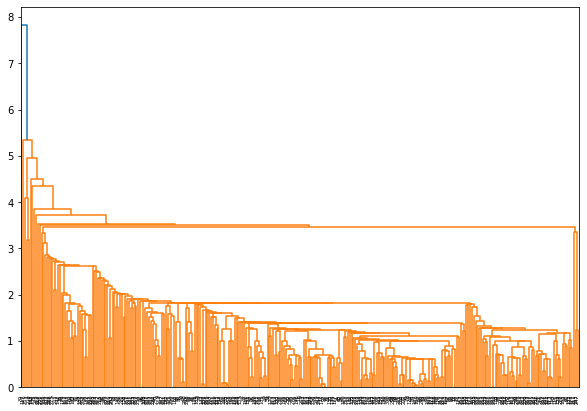

In [261]:
plt.figure(figsize=(10,7))
dendro = hie.dendrogram(hie.linkage(scaleddf, method="single"))

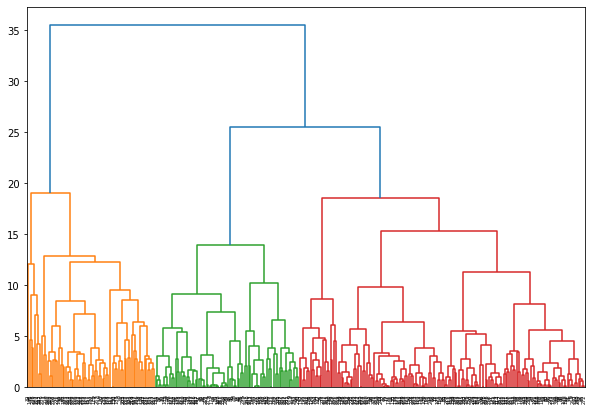

In [262]:
plt.figure(figsize=(10,7))
dendro = hie.dendrogram(hie.linkage(scaleddf, method="ward"))

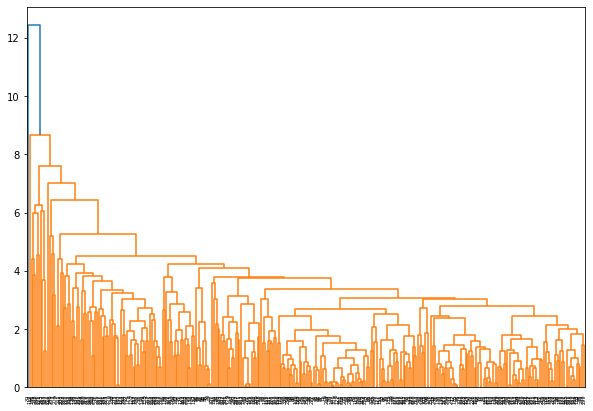

In [263]:
plt.figure(figsize=(10,7))
dendro = hie.dendrogram(hie.linkage(scaleddf, method="average"))

In [264]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
agglomodel = agglo.fit_predict(scaleddf)
agglomodel

array([2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 3, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 3, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2,
       2, 1, 0, 2, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0,

In [265]:
df1 = df
df1['agglo'] = agglomodel


df1.groupby('agglo').agg(AreaCategory = ('Area Category', 'mean'), 
                           LuasTanah = ('Luas Tanah (m2)', pd.Series.mode), 
                           LuasBangunan = ('Luas Bangunan (m2)', 'mean'), 
                           JumlahKamar = ('Jumlah Kamar', 'mean'), 
                           JumlahKamarMandi = ('Jumlah Kamar Mandi', 'mean'), 
                          Tingkat = ('Tingkat/Lantai ', pd.Series.mode), 
                          Harga = ('Harga Penawaran (dari Owner)', 'mean'), 
                          ArahHadap = ('Arah Hadap Rumah', pd.Series.mode), 
                          Posisi = ('Posisi Rumah', pd.Series.mode), 
                          LebarJalan = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), 
                          Count = ('agglo', 'count'))

# df1['agglo'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AreaCategory,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat,Harga,ArahHadap,Posisi,LebarJalan,Count
agglo,,,,,,,,,,,
0,1.464968,240.0,218.210191,4.356688,3.428916,2.0,3.092723e+09,3,2,2,157
1,1.032258,450.0,510.709677,5.741935,4.919355,2.0,9.613468e+09,3,2,2,62
2,2.379747,72.0,115.911392,2.734177,1.746835,1.0,1.573573e+09,3,2,2,79
3,1.000000,942.0,815.000000,6.500000,4.875000,1.0,4.056250e+10,3,2,3,8
